# AFTER-CLASS CLASE 09 - CON DATASET "VENTAS"

Este cuaderno tiene ejemplos del uso de estadística descriptiva. Trata algunos temas de las clases 9 a 11.


# Estadística Descriptiva:

## Análisis de Ventas - Medidas de Tendencia Central y Dispersión
Vamos a calcular medidas de tendencia central y dispersión sobre el dataset "ventas" que usamos en la Pre-Entrega.

Presentar los resultados en un pequeño informe.

In [1]:
# -------------------------------------------------------
# Cargar y limpiar los datos
# -------------------------------------------------------
import pandas as pd
df = pd.read_csv("ventas.csv")

# Precio: Eliminamos símbolos $ y conviertimos a número
df['precio'] = (
    df['precio']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace('.', '', regex=False)      # quita separador de miles
    .str.replace(',', '.', regex=False)     # reemplaza coma por punto decimal
    .astype(float)
)

# Eliminamos filas con nulos críticos
mask_validos = df['precio'].notna() & df['cantidad'].notna()
eliminados_nulos = (~mask_validos).sum()
df = df[mask_validos].copy()

# Eliminamos duplicados exactos
df = df.drop_duplicates().copy()


# "espiamos" como queda el df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     2998 non-null   int64  
 1   producto     2998 non-null   object 
 2   precio       2998 non-null   float64
 3   cantidad     2998 non-null   float64
 4   fecha_venta  2998 non-null   object 
 5   categoria    2998 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 164.0+ KB


In [2]:
# -------------------------------------------------------
# Medidas de tendencia central
# -------------------------------------------------------

media = df['precio'].mean()
mediana = df['precio'].median()
moda = df['precio'].mode()

print(f"Media  : {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print("Moda   :",moda.values)


Media  : 7529.13
Mediana: 7520.50
Moda   : [2977. 5933. 7632. 9621. 9707.]


In [3]:
# -------------------------------------------------------
# Medidas de dispersión
# -------------------------------------------------------

rango = df['precio'].max() - df['precio'].min()
varianza = df['precio'].var()
desviacion = df['precio'].std()

print(f"Rango...............: {rango:.2f}")
print(f"Varianza............: {varianza:.2f}")
print(f"Desviación estándar : {desviacion:.2f}")


Rango...............: 9897.00
Varianza............: 8257581.83
Desviación estándar : 2873.60


In [4]:
# -------------------------------------------------------
# Medidas de dispersión
# -------------------------------------------------------
print("-"*40)
print("Informe final de la columna 'precios'")
print("-"*40)

print(f"Media...............: {media:.2f}")
print(f"Mediana.............: {mediana:.2f}")
print("Moda................:", moda.values)
print(f"Rango...............: {rango:.2f}")
print(f"Varianza............: {varianza:.2f}")
print(f"Desviación estándar : {desviacion:.2f}")


----------------------------------------
Informe final de la columna 'precios'
----------------------------------------
Media...............: 7529.13
Mediana.............: 7520.50
Moda................: [2977. 5933. 7632. 9621. 9707.]
Rango...............: 9897.00
Varianza............: 8257581.83
Desviación estándar : 2873.60


## Interpretar los resultados:

---

###  **1. Medidas de tendencia central**

| Medida      | Valor     | Interpretación   |
| ----------- | --------- | ---------------- |
| **Media**   | 7529.13   | Es el precio promedio general .     |
| **Mediana** | 7520.50   | La mitad de los precios están debajo de ~7520 y la otra mitad por encima.  |
| **Moda**    | [2977, ....] | No hay un valor único dominante. |


**Conclusión(parcial):**
1. Media y mediana casi iguales: sugiere que la distribución de precios es **bastante simétrica** (si precios muy altos o muy bajos).
2. La presencia de **varias modas** indica que el catálogo puede tener **grupos de productos con precios repetidos** (por ejemplo, diferentes líneas o categorías con precios estándar).

---

### **2. Medidas de dispersión**

| Medida     | Valor    | Interpretación  |
| ---------- | -------- | --------------- |
| **Rango**  | 9897.00  | Gran diferencia entre el producto más barato y el más caro.   |
| **Varianza** | 8,257,581.83 | Elevada, gran dispersión en los precios.          |
| **Desviación estándar** | 2873.60   | En promedio, los precios se alejan unos 2800 pesos de la media. |

**Conclusión(parcial):**
Los precios están **muy dispersos**: algunos productos valen mucho más o mucho menos que el promedio.

---

### **3. Interpretación general**

Combinando todas las medidas:

* Los precios tienen una **distribución general equilibrada** (media ≈ mediana).
* Sin embargo, **la amplitud y la desviación estándar son grandes**, por lo que hay **categorías de precios bien diferenciadas**.
* Esto podría corresponder, por ejemplo, a un comercio que vende productos de distintos rangos: desde económicos hasta premium.

---

### **Conclusión**

> El conjunto de precios es **heterogéneo**, con una estructura de precios agrupada en varios niveles (lo muestran las múltiples modas).
> Aunque el promedio ronda los 7500 $, la alta desviación estándar muestra que el cliente puede encontrar productos tanto muy por debajo como muy por encima de ese valor.

# Plus: Grafiquitos!

### Histograma super espartano, solo con Pandas:

<Axes: ylabel='Frequency'>

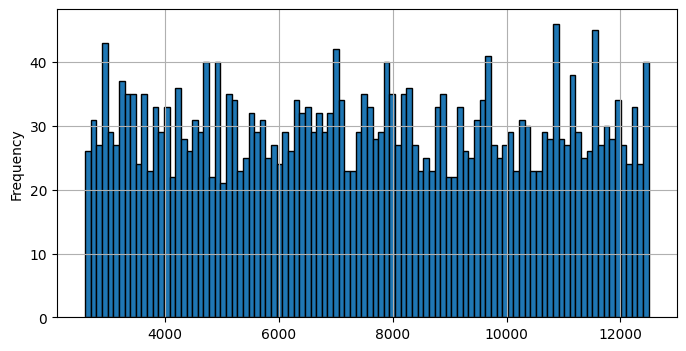

In [5]:
df['precio'].plot(kind='hist', bins=100, edgecolor='black', figsize=(8,4), grid=True)

### Y nos vamos con uno algo mejor, con Matplotlib:

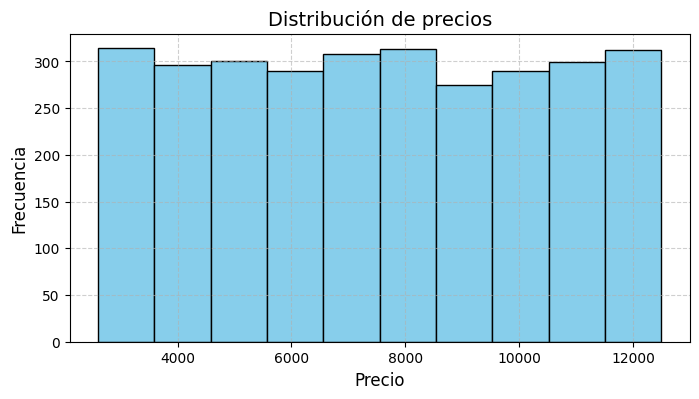

In [6]:
# Importamos la libreria
import matplotlib.pyplot as plt

# Creaamos el histograma de la columna 'precio'
plt.figure(figsize=(8,4))
plt.hist(df['precio'], bins=10, color='skyblue', edgecolor='black')

# Etiquetas y título personalizados
plt.title("Distribución de precios", fontsize=14)
plt.xlabel("Precio", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

# Cuadrícula opcional
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar gráfico
plt.show()
